# Kernel Convolution Testing For Various Image Filters

## Import Libraries

In [122]:
import os, warnings
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

## Load Image

In [124]:
image = tf.io.read_file(rf'C:\Users\user\Downloads\Cars Dataset\train\Rolls Royce\1.jpg')

## Preprocess Image

In [125]:
def preprocess_image(image):
    image = tf.io.decode_jpeg(image, channels=1)

    # Resize image
    image = tf.image.resize(image, size=[400, 400])
    
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    plt.imshow(image, cmap='gray')

    image = tf.expand_dims(image, axis=0)

    print(f"image shape: {image.shape}")

    return image

image shape: (1, 400, 400, 1)


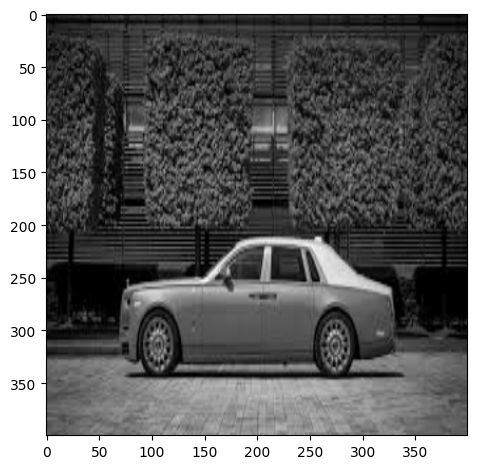

In [126]:
image = preprocess_image(image)

## Create Kernel For Convolution

In [127]:
def create_image_filter(kernel, image, strides=1, padding='SAME', conv_fn = tf.nn.conv2d):
    kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
    kernel = tf.cast(kernel, dtype=tf.float32)

    image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME',
    )

    plt.imshow(
        # Reformat for plotting
        tf.squeeze(image_filter)
    )
    plt.axis('off')
    plt.show();

    return image_filter

## Various Kernels Experimentation

In [128]:
kernel_edge = tf.constant([
     [-1, -1, -1],
     [-1, 8, -1],
     [-1, -1, -1]
])

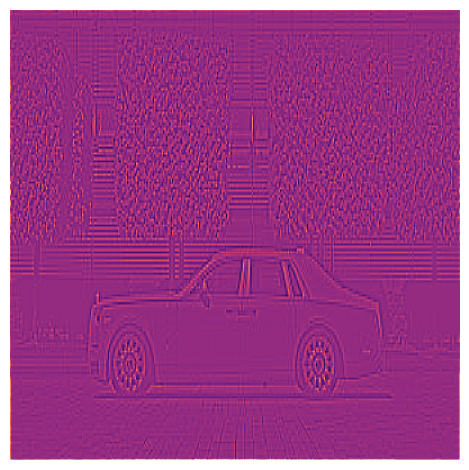

In [129]:
filter = create_image_filter(kernel_edge, image)

In [130]:
kernel_2 = tf.constant([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])

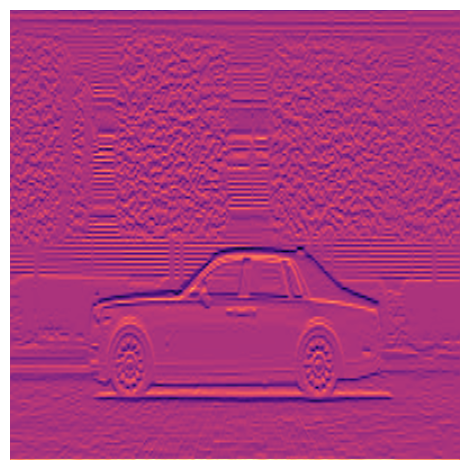

In [131]:
filter = create_image_filter(kernel_2, image)

In [132]:
kernel_3 = tf.constant([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

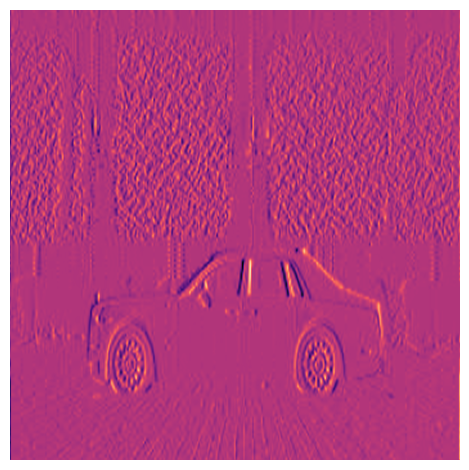

In [133]:
filter = create_image_filter(kernel_3, image)

In [134]:
kernel_sharpen = tf.constant([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

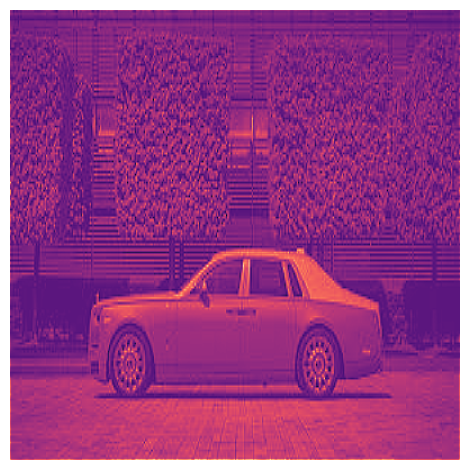

In [135]:
filter = create_image_filter(kernel_sharpen, image)

In [136]:
kernel_emboss = tf.constant([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
])

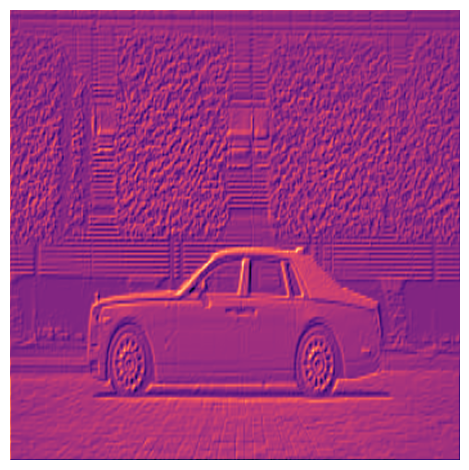

In [137]:
filter = create_image_filter(kernel_emboss, image)